# Random Walks en Alianzas de Aerolíneas

## Paquetes

In [1]:
using StatsBase

In [2]:
using DelimitedFiles

In [3]:
using Plots

In [204]:
using Plotly

┌ Info: Precompiling Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1186


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14561402695442815899\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4543783454519436597\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/d8f38831b0d0bb291a6a5e63a8ad83a7ec920338-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-14561402695442815899\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

In [206]:
using FreqTables

┌ Info: Precompiling FreqTables [da1fdf0e-e0ff-5433-a45f-9bb5ff651cb1]
└ @ Base loading.jl:1186


In [230]:
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1186


In [250]:
using Documenter

┌ Info: Precompiling Documenter [e30172f5-a6a5-5a46-863b-614d45cd2de4]
└ @ Base loading.jl:1186


In [287]:
Pkg.add("Gadfly")

 Resolving package versions...
 Installed Media ────────── v0.5.0
 Installed Hexagons ─────── v0.2.0
 Installed Loess ────────── v0.5.0
 Installed Juno ─────────── v0.7.0
 Installed IndirectArrays ─ v0.5.0
 Installed CoupledFields ── v0.1.0
 Installed Gadfly ───────── v1.0.1
  Updating `/Users/Yuriko/.julia/environments/v1.1/Project.toml`
  [c91e804a] + Gadfly v1.0.1
  Updating `/Users/Yuriko/.julia/environments/v1.1/Manifest.toml`
  [7ad07ef1] + CoupledFields v0.1.0
  [c91e804a] + Gadfly v1.0.1
  [a1b4810d] + Hexagons v0.2.0
  [9b13fd28] + IndirectArrays v0.5.0
  [e5e0dc1b] + Juno v0.7.0
  [4345ca2d] + Loess v0.5.0
  [e89f7d12] + Media v0.5.0


In [4]:
cd("$(homedir())/Documents/UNAM/Tesis_Lic")

## Funciones

In [251]:
"""
    n_in_degree(M::Array{Int64,2}, n::Int64)

Función que obtiene el grado de entrada de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de entrada del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_in_degree(M::Array{Int64,2}, n::Int64)
    grado_entrada = sum(M[n, :])
end

n_in_degree (generic function with 1 method)

In [252]:
?n_in_degree

search: n_in_degree



No documentation found.

`n_in_degree` is a `Function`.

```
# 1 method for generic function "n_in_degree":
[1] n_in_degree(M::Array{Int64,2}, n::Int64) in Main at In[251]:19
```


In [6]:
"""
in_degree(M)

Función que obtiene el grado de entrada de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de entrada de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function in_degree(M::Array)
    grados_entrada = sum(M, dims = 2)
end

in_degree (generic function with 1 method)

In [7]:
"""
n_out_degree(M, n)

Función que obtiene el grado de salida de un cierto nodo n de la red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}
* n nodo a evaluar de tipo Int64

Resultado:
Grado de salida del nodo n representado por un valor numérico de tipo Int64

## Implementación

### Ejemplos
"""

function n_out_degree(M::Array{Int64,2}, n::Int64)
    grado_salida = sum(M[:, n])
end

n_out_degree (generic function with 1 method)

In [8]:
"""
out_degree(M)

Función que obtiene el grado de salida de una red representada por la matriz de adyacencia M.

Parámetros:
* M matriz de adyacencia que acepta un arreglo de tipo Array{Int64,2}

Resultado:
Devuelve un arreglo de tipo Array{Int64,2} que contiene los grados de salida de todos los nodos n de la red.

## Implementación

### Ejemplos
"""

function out_degree(M::Array)
    grados_salida = sum(M, dims = 1)
end

out_degree (generic function with 1 method)

In [9]:
"""
La función r_walks tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
f, nodo inicial de tipo Int64
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz, el cual tiene igual probabilidad de avanzar 
hacia cualquiera de sus vecinos.
Regresa un arreglo que contiene todas las trayectorias que tomó el caminante aleatorio.
"""

function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    nodos = size(M, 1) #aeropuertos  
    paths = zeros(Int64, (iter, steps + 1))
    s = f

    for i in 1:iter
        paths[i, 1] = f
        for p in 1:steps 
            row = M[s, :] #Renglón correspondiente al nodo s
            vecinos = findall(x -> x != 0, row)
            if vecinos == []
                break
            else
                a = sample(vecinos)
                paths[i, p + 1] = a
            s = a
            end
        end
        s = f
    end
    return paths 
end

r_walks (generic function with 1 method)

In [10]:
"""
La función random_walk tiene como parámetros:
M, matriz de adyacencia de tipo Array{Int64,2}
steps, número de pasos de tipo Int64
iter, número de iteraciones de tipo Int64.
La función crea un caminante aleatorio sobre la matriz con igual probabilidad de avanzar 
hacia cualquiera de sus vecinos. Esta función recorre todos los nodos de la red como
nodos iniciales y sobre ellos itera para obtener el número de caminos que se le pidió.
Regresa un arreglo que contiene arreglos asociados a todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) #Debo agregarle el nodo inicial al inicio del path
    random_walks = []
    nodos = size(M, 1)
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    random_walks
end

random_walk (generic function with 1 method)

In [11]:
"""
La función walk_length tiene como parámetros:
RW, arreglo de arreglos de tipo Array{Any,1} que corresponde al arreglo de caminatas aleatorias.
La función regresa un arreglo de arreglos que contiene las longitudes de todas las trayectorias que tomó el 
caminante aleatorio para cada nodo inicial de la red.
"""

function walk_length(W)
    
    longitudes = Array[]
    c = 0
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v
        #@show i
        for j in 1:s
            #@show j
            for k in 1:t
                #@show k
                
                if W[i][j, :][k] != 0 #W[i][j, :] #renglón a analizar
                    c += 1 
                else
                    break
                end
                
            end
            longz[j] = c - 1
            #@show longz[j]
            c = 0
            
        end
        push!(longitudes, longz)
        #@show longitudes
        longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    end
    return longitudes
end

walk_length (generic function with 1 method)

In [12]:
"""
La función walk_av_length tiene como parámetro W, que es un arreglo de arreglos (que se puede obtener de la 
función walk_length). 
Regresa un arreglo con entradas correspondientes al promedio de las longitudes de 
las caminatas aleatorias para cada nodo de inicio antes de caer en un nodo con grado de salida 0.
"""

function walk_av_length(W) #Llamar a función
    
    proms = []
    wlength = walk_length(W)
    
    for i in 1:length(wlength)
        av = mean(wlength[i])
        push!(proms, av)
    end
    proms
end

walk_av_length (generic function with 1 method)

In [15]:
"""
La función caminos tiene como parámetro W que es un arreglo de arreglos.
Regresa los nodos diferentes a los que llega el caminante.
"""

function nodos_visitados(W)
    
    cobert = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    #visit = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    visit = []
    
    for i in 1:v        
        for j in 1:s
            u = unique(W[i][j, :])
            push!(visit, u)
        end
        push!(cobert, visit)
        visit = []
    end
    return cobert
end

nodos_visitados (generic function with 1 method)

In [ ]:
function frecuencia_visitas_it(V::Array)
    
end

In [16]:
"""
La función cobertura tiene como parámetro W que es un arreglo de arreglos.
Regresa el número de nodos diferentes a los que llega el caminante.
"""

function cobertura(W) 
    
    cobert = []
    
    v = length(W) #tamaño de la matriz, número de nodos
    x = nodos_visitados(W)
    s = size(x[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    longz = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            l = length(x[i][j])
            longz[j] = l
        end
        push!(cobert, longz)
        longz = zeros(Int64, s)
    end
    return cobert
end

cobertura (generic function with 1 method)

In [73]:
"""
n_length_av con parámetro W (caminatas) da el promedio de la caminata por nodo inicial. 
"""

function n_cobertura_av(W) #Esta es la importante
    
    longitud = []
    x = cobertura(W)
    
    for i in 1:length(x)
        l = mean(x[i])
        push!(longitud, l)
    end
    longitud
end

n_cobertura_av (generic function with 1 method)

In [105]:
"""
length_av da el promedio de la longitud de las caminatas para todos los nodos.
"""

function cobertura_av(W)
    x = n_cobertura_av(W)
    promedio = mean(x)
    return promedio

end

cobertura_av (generic function with 1 method)

In [19]:
"""
Da la longitud máxima de cada iteración de cada nodo inicial.
"""

function max_length(W)
    max = []
    x = cobertura(W)
    for i in 1:length(x)
        m = maximum(x[i])
        push!(max, m)
    end
    max
end

max_length (generic function with 1 method)

In [20]:
"""
Da la longitud máxima total.
"""

function Max_length(W)
    x = max_length(W)
    m = maximum(x)
    return m
end

Max_length (generic function with 1 method)

In [21]:
"""
Regresa el promedio de la longitud máxima de cada nodo inicial.
"""

function av_max_length(W)
    x = max_length(W)
    prom = mean(x)
    return prom
end

av_max_length (generic function with 1 method)

In [22]:
"""
Da la longitud mínima de cada iteración de cada nodo inicial.
"""

function min_length(W)
    min = []
    x = cobertura(W)
    for i in 1:length(x)
        m = minimum(x[i])
        push!(min, m)
    end
    min
end

min_length (generic function with 1 method)

In [23]:
"""
Da la longitud mínima total.
"""

function Min_length(W)
    x = min_length(W)
    m = minimum(x)
    return m
end

Min_length (generic function with 1 method)

In [24]:
"""
Regresa el promedio de la longitud mínima de cada nodo inicial.
"""

function av_min_length(W)
    x = min_length(W)
    prom = mean(x)
    return prom
end

av_min_length (generic function with 1 method)

In [26]:
"""
Atractor regresa un arreglo de arreglos que contiene los nodos en los que cae cada caminata y ya no puede salir.
"""

function atractor(W) #Debo llamar a walks
   atractores = []
    v = length(W) #tamaño de la matriz, número de nodos
    s = size(W[1], 1) #lo puedo sacar, para todos es el mismo. Es el número de iteraciones
    t = size(W[1], 2) #número de pasos
    atract = zeros(Int64, s) #Arreglo de ceros de tamaño número de iteraciones
    
    for i in 1:v        
        for j in 1:s
            a = W[i][j, :][t - 1]
            atract[j] = a
        end
        push!(atractores, atract)
        atract = zeros(Int64, s)
    end
    return atractores
end

atractor (generic function with 1 method)

## Datos

In [34]:
mSA = readdlm("data/multi_SA_du.csv", ',');

935×935 Array{Any,2}:
 ""      "AOK"   "ARN"   "ATH"   "AUH"  …   "GLF"   "TMU"   "GET"   "PWM"
 "AOK"  0       0       1       0          0       0       0       0     
 "ARN"  0       0       1       0          0       0       0       0     
 "ATH"  1       1       0       1          0       0       0       0     
 "AUH"  0       0       1       0          0       0       0       0     
 "AXD"  0       0       1       0       …  0       0       0       0     
 "BCN"  0       1       1       0          0       0       0       0     
 "BEG"  0       0       1       0          0       0       0       0     
 "BOD"  0       0       0       0          0       0       0       0     
 "BRU"  0       1       1       0          0       0       0       0     
 "BUD"  0       0       1       0       …  0       0       0       0     
 "CAI"  0       0       1       1          0       0       0       0     
 "CDG"  0       1       1       0          0       0       0       0     
 ⋮              

In [38]:
nom_SA = mSA[1, :];
nombres_SA = nom_SA[2:end]

934-element Array{Any,1}:
 "AOK"
 "ARN"
 "ATH"
 "AUH"
 "AXD"
 "BCN"
 "BEG"
 "BOD"
 "BRU"
 "BUD"
 "CAI"
 "CDG"
 "CFU"
 ⋮    
 "STL"
 "STT"
 "SYR"
 "TKK"
 "YAP"
 "HSN"
 "JUZ"
 "YIC"
 "GLF"
 "TMU"
 "GET"
 "PWM"

In [28]:
multiSA = mSA[2:end, :];
multiSA = multiSA[:, 2:end];

In [29]:
multiplexSA = convert(Array{Int64,2}, multiSA)

934×934 Array{Int64,2}:
 0  0  1  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  1  0  0  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  1  0  0  0  1  1  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  0  1  1  0  1  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  1  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0  

In [30]:
mOW = readdlm("data/multi_OW_du.csv", ',');

In [39]:
nom_OW = mOW[1, :];
nombres_OW = nom_OW[2:end]

698-element Array{Any,1}:
 "EZE"
 "MIA"
 "PUJ"
 "ABE"
 "ABQ"
 "AGS"
 "ALB"
 "AMS"
 "ANC"
 "ANU"
 "ASU"
 "ATH"
 "ATL"
 ⋮    
 "CRW"
 "LEX"
 "MOB"
 "PWM"
 "TYS"
 "VPS"
 "KEM"
 "AAL"
 "SLA"
 "TUC"
 "IQT"
 "NJC"

In [31]:
multiOW = mOW[2:end, :];
multiOW = multiOW[:, 2:end];

In [32]:
multiplexOW = convert(Array{Int64,2}, multiOW)

698×698 Array{Int64,2}:
 0  1  1  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  1  0  0  0  0  0  0  1  1  0  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  

In [40]:
mST = readdlm("data/multi_ST_du.csv", ',');

In [41]:
nom_ST = mST[1, :];
nombres_ST = nom_ST[2:end]

900-element Array{Any,1}:
 "AGF"
 "AJA"
 "AMS"
 "AUR"
 "BES"
 "BIA"
 "BIQ"
 "BLQ"
 "BOD"
 "BRU"
 "BVE"
 "CFE"
 "CFR"
 ⋮    
 "VCL"
 "VDH"
 "VII"
 "VKG"
 "ANR"
 "CWL"
 "DOL"
 "JER"
 "AOI"
 "PSA"
 "PWM"
 "ESB"

In [157]:
?counts

search: counts addcounts! codeunits countlines count_ones ncodeunits count_zeros



```
counts(x, [wv::AbstractWeights])
counts(x, levels::UnitRange{<:Integer}, [wv::AbstractWeights])
counts(x, k::Integer, [wv::AbstractWeights])
```

Count the number of times each value in `x` occurs. If `levels` is provided, only values falling in that range will be considered (the others will be ignored without raising an error or a warning). If an integer `k` is provided, only values in the range `1:k` will be considered.

If a weighting vector `wv` is specified, the sum of the weights is used rather than the raw counts.

The output is a vector of length `length(levels)`.


In [277]:
c = random_walk(multiplexST, 100, 2)

900-element Array{Any,1}:
 [1 35 … 95 101; 1 15 … 657 511]       
 [2 136 … 3 618; 2 31 … 549 831]       
 [3 121 … 188 811; 3 137 … 73 382]     
 [4 35 … 52 346; 4 35 … 73 239]        
 [5 133 … 201 65; 5 133 … 219 103]     
 [6 136 … 171 557; 6 31 … 579 283]     
 [7 35 … 171 662; 7 33 … 58 46]        
 [8 18 … 326 65; 8 95 … 388 73]        
 [9 34 … 18 897; 9 28 … 421 394]       
 [10 38 … 321 156; 10 18 … 599 643]    
 [11 133 … 261 254; 11 2 … 95 171]     
 [12 95 … 123 476; 12 28 … 123 375]    
 [13 33 … 787 188; 13 33 … 0 0]        
 ⋮                                     
 [889 48 … 30 95; 889 48 … 184 161]    
 [890 61 … 61 60; 890 48 … 47 511]     
 [891 718 … 497 49; 891 588 … 813 134] 
 [892 61 … 90 95; 892 61 … 289 194]    
 [893 133 … 814 188; 893 133 … 739 188]
 [894 35 … 0 0; 894 896 … 549 853]     
 [895 133 … 330 585; 895 133 … 61 188] 
 [896 894 … 283 567; 896 894 … 61 50]  
 [897 0 … 0 0; 897 0 … 0 0]            
 [898 0 … 0 0; 898 0 … 0 0]            
 [899 0 … 0 0;

In [286]:

#
j = sort(c[1][1,:])
x = nombres_ST[j]
h = countmap(x)
#histogram(h)
#hh=sort(h)

Dict{Any,Int64} with 67 entries:
  "MXZ" => 1
  "NBO" => 2
  "CDG" => 4
  "AGF" => 1
  "DEN" => 1
  "CAN" => 1
  "MAD" => 1
  "FLL" => 1
  "VCE" => 1
  "TPE" => 1
  "SGN" => 2
  "TLS" => 1
  "HAN" => 1
  "TNR" => 1
  "GPT" => 1
  "LGA" => 1
  "HNL" => 1
  "RMQ" => 3
  "DTW" => 3
  "MOB" => 1
  "VDH" => 1
  "FUK" => 1
  "JFK" => 3
  "BWI" => 1
  "DUB" => 1
  ⋮     => ⋮

In [271]:
oh=hcat(hh)

1×1 Array{OrderedCollections.OrderedDict{Any,Int64},2}:
 OrderedCollections.OrderedDict("AGF"=>1,"AGP"=>1,"AMS"=>1,"ATL"=>4,"AUH"=>2,"BAH"=>1,"BDJ"=>1,"BES"=>1,"BHY"=>1,"BIA"=>2…)

In [273]:
bar(oh)

MethodError: MethodError: no method matching AbstractFloat(::Type{OrderedCollections.OrderedDict{Any,Int64}})
Closest candidates are:
  AbstractFloat(!Matched::Bool) at float.jl:252
  AbstractFloat(!Matched::Int8) at float.jl:253
  AbstractFloat(!Matched::Int16) at float.jl:254
  ...

In [261]:
f=freqtable(j)

73-element Named Array{Int64,1}
Dim1  │ 
──────┼──
1     │ 1
3     │ 1
35    │ 1
47    │ 1
50    │ 2
52    │ 2
60    │ 1
62    │ 1
63    │ 1
65    │ 1
73    │ 1
95    │ 2
⋮       ⋮
564   │ 1
565   │ 1
585   │ 1
586   │ 1
596   │ 1
606   │ 1
659   │ 1
704   │ 2
721   │ 2
759   │ 1
782   │ 1
850   │ 1

In [212]:
l = freqtable(x)

73-element Named Array{Int64,1}
Dim1  │ 
──────┼──
"ACA" │ 1
"AER" │ 1
"AGF" │ 1
"AMS" │ 1
"ATL" │ 1
"CDG" │ 2
"CGK" │ 3
"CJU" │ 1
"CKG" │ 2
"CMB" │ 1
"CME" │ 1
"CMH" │ 1
⋮       ⋮
"SVO" │ 1
"SYD" │ 1
"SYX" │ 1
"SZX" │ 1
"TAO" │ 2
"TPE" │ 1
"TSA" │ 1
"TSN" │ 2
"ULN" │ 1
"WUX" │ 2
"XMN" │ 1
"YIH" │ 1

In [220]:
n =names(l)

1-element Array{Array{Any,1},1}:
 ["ACA", "AER", "AGF", "AMS", "ATL", "CDG", "CGK", "CJU", "CKG", "CMB"  …  "SYX", "SZX", "TAO", "TPE", "TSA", "TSN", "ULN", "WUX", "XMN", "YIH"]

In [224]:
typeof(l)

NamedArrays.NamedArray{Int64,1,Array{Int64,1},Tuple{OrderedCollections.OrderedDict{Any,Int64}}}

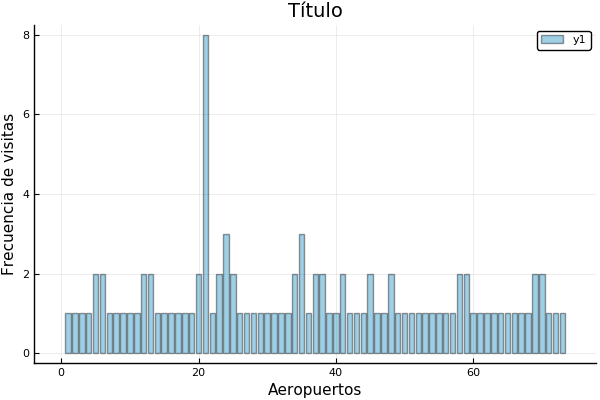

In [262]:
#bar(l)
bar(f,
    color="#0f87bf",
    title="Título",
    xlabel="Aeropuertos",
    ylabel = "Frecuencia de visitas", 
    #xticks = names(l),
    alpha=0.4)

In [ ]:
prueba=

In [196]:
k = countmap(x)


Dict{Any,Int64} with 73 entries:
  "LYA" => 2
  "PVG" => 3
  "PKY" => 1
  "HND" => 1
  "SYD" => 1
  "CDG" => 2
  "PBI" => 1
  "SVO" => 1
  "JJN" => 1
  "TSN" => 2
  "AGF" => 1
  "IST" => 1
  "IAD" => 1
  "TPE" => 1
  "PAZ" => 1
  "PXM" => 1
  "ICN" => 2
  "LGA" => 2
  "CMH" => 1
  "PEK" => 2
  "HKT" => 1
  "DTW" => 2
  "RMQ" => 1
  "KMG" => 1
  "MDG" => 1
  ⋮     => ⋮

In [267]:
get(k, 145, "NA")

"NA"

In [203]:
freqtable(k)

UndefVarError: UndefVarError: freqtable not defined

In [195]:
histogram()

850-element Array{Int64,1}:
 1
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

In [42]:
multiST = mST[2:end, :];
multiST = multiST[:, 2:end];

In [43]:
multiplexST = convert(Array{Int64,2}, multiST)

900×900 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  1  0  0  1  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  

## Caminatas aleatorias

### Star Alliance

In [44]:
caminata_SA = @time random_walk(multiplexSA, 100, 5)

  5.888562 seconds (5.34 M allocations: 3.831 GiB, 6.38% gc time)


934-element Array{Any,1}:
 [1 3 … 384 423; 1 61 … 116 87; … ; 1 61 … 331 318; 1 3 … 26 16]               
 [2 558 … 351 119; 2 542 … 19 322; … ; 2 731 … 318 174; 2 3 … 158 105]         
 [3 60 … 115 102; 3 20 … 920 117; … ; 3 50 … 383 98; 3 36 … 174 296]           
 [4 3 … 344 317; 4 162 … 73 83; … ; 4 3 … 126 396; 4 223 … 868 263]            
 [5 3 … 877 117; 5 3 … 388 387; … ; 5 3 … 115 298; 5 3 … 570 9]                
 [6 20 … 495 520; 6 553 … 71 838; … ; 6 80 … 9 538; 6 20 … 296 318]            
 [7 54 … 111 19; 7 20 … 331 367; … ; 7 3 … 553 60; 7 73 … 292 363]             
 [8 23 … 0 0; 8 23 … 528 2; … ; 8 23 … 542 83; 8 23 … 621 614]                 
 [9 559 … 674 553; 9 553 … 729 495; … ; 9 2 … 318 292; 9 781 … 235 102]        
 [10 19 … 184 170; 10 3 … 7 3; … ; 10 9 … 260 113; 10 83 … 385 302]            
 [11 290 … 300 318; 11 83 … 6 80; … ; 11 187 … 26 512; 11 169 … 414 331]       
 [12 9 … 153 157; 12 62 … 232 19; … ; 12 600 … 677 578; 12 262 … 253 80]       
 [13 3 … 408 3

### OneWorld

In [45]:
caminata_OW = @time random_walk(multiplexOW, 100, 5)

  2.594020 seconds (3.07 M allocations: 1.899 GiB, 8.20% gc time)


698-element Array{Any,1}:
 [1 11 … 61 130; 1 207 … 292 168; … ; 1 89 … 197 177; 1 3 … 451 440]    
 [2 239 … 161 120; 2 180 … 261 624; … ; 2 45 … 135 413; 2 121 … 261 636]
 [3 207 … 0 0; 3 1 … 60 2; … ; 3 10 … 207 527; 3 2 … 61 172]            
 [4 177 … 0 0; 4 177 … 0 0; … ; 4 177 … 0 0; 4 177 … 604 62]            
 [5 61 … 292 579; 5 61 … 465 85; … ; 5 61 … 0 0; 5 61 … 477 97]         
 [6 46 … 271 52; 6 46 … 97 81; … ; 6 46 … 277 653; 6 46 … 0 0]          
 [7 46 … 0 0; 7 177 … 538 120; … ; 7 177 … 590 292; 7 177 … 46 76]      
 [8 127 … 98 229; 8 292 … 0 0; … ; 8 292 … 139 2; 8 271 … 0 0]          
 [9 178 … 0 0; 9 178 … 556 273; … ; 9 178 … 2 124; 9 178 … 440 462]     
 [10 3 … 0 0; 10 364 … 0 0; … ; 10 3 … 0 0; 10 218 … 66 115]            
 [11 2 … 0 0; 11 2 … 127 40; … ; 11 2 … 52 207; 11 1 … 31 446]          
 [12 292 … 121 271; 12 177 … 119 178; … ; 12 292 … 0 0; 12 177 … 1 207] 
 [13 61 … 0 0; 13 105 … 178 163; … ; 13 61 … 115 2; 13 61 … 229 273]    
 ⋮                       

### Sky Team

In [46]:
caminata_ST = @time random_walk(multiplexST, 100, 5)

  5.164911 seconds (4.52 M allocations: 3.390 GiB, 7.23% gc time)


900-element Array{Any,1}:
 [1 35 … 786 134; 1 35 … 612 549; … ; 1 15 … 222 421; 1 15 … 500 346]          
 [2 136 … 830 176; 2 37 … 449 95; … ; 2 11 … 842 617; 2 15 … 527 518]          
 [3 274 … 736 38; 3 187 … 101 123; … ; 3 164 … 585 330; 3 196 … 3 126]         
 [4 35 … 605 171; 4 35 … 127 52; … ; 4 35 … 512 518; 4 35 … 502 46]            
 [5 35 … 42 30; 5 35 … 0 0; … ; 5 28 … 608 333; 5 31 … 437 239]                
 [6 33 … 188 742; 6 25 … 61 50; … ; 6 136 … 437 432; 6 25 … 66 95]             
 [7 33 … 52 580; 7 28 … 123 171; … ; 7 35 … 585 594; 7 35 … 287 677]           
 [8 286 … 219 123; 8 286 … 655 315; … ; 8 28 … 491 171; 8 188 … 205 38]        
 [9 31 … 821 549; 9 18 … 171 313; … ; 9 3 … 180 437; 9 35 … 225 219]           
 [10 188 … 196 31; 10 73 … 18 302; … ; 10 188 … 592 320; 10 73 … 866 743]      
 [11 133 … 123 447; 11 2 … 466 103; … ; 11 2 … 623 626; 11 133 … 333 127]      
 [12 3 … 593 52; 12 35 … 396 73; … ; 12 3 … 103 447; 12 28 … 127 61]           
 [13 33 … 290 

## Longitud de todas las caminatas 

In [47]:
@time walk_length(caminata_SA)

  0.662262 seconds (1.54 M allocations: 419.889 MiB, 11.82% gc time)


934-element Array{Array,1}:
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [13, 100, 100, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 ⋮                        
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 41, 100, 100, 100] 
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

In [48]:
@time walk_length(caminata_OW)

  0.407760 seconds (924.09 k allocations: 267.667 MiB, 14.27% gc time)


698-element Array{Array,1}:
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [91, 100, 100, 100, 100] 
 [8, 88, 100, 6, 100]     
 [100, 100, 100, 66, 100] 
 [100, 100, 100, 100, 44] 
 [2, 100, 100, 100, 100]  
 [100, 91, 53, 100, 26]   
 [91, 100, 100, 100, 100] 
 [38, 73, 2, 7, 100]      
 [41, 100, 100, 100, 100] 
 [100, 100, 100, 38, 100] 
 [66, 100, 62, 100, 100]  
 ⋮                        
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

In [49]:
@time walk_length(caminata_ST)

  0.578502 seconds (1.38 M allocations: 386.130 MiB, 11.64% gc time)


900-element Array{Array,1}:
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 42, 47, 100, 100]  
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 ⋮                        
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 37, 100, 100, 62]  
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 100]
 [100, 100, 100, 100, 17] 
 [100, 97, 100, 100, 100] 
 [100, 100, 100, 100, 78] 
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          
 [0, 0, 0, 0, 0]          

## Longitud promedio de las caminatas de cada nodo

In [53]:
lpn_SA = @time walk_av_length(caminata_SA)

  0.613291 seconds (1.47 M allocations: 416.356 MiB, 12.33% gc time)


934-element Array{Any,1}:
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
  82.6
 100.0
 100.0
 100.0
 100.0
 100.0
   ⋮  
 100.0
 100.0
 100.0
 100.0
  88.2
 100.0
 100.0
 100.0
   0.0
   0.0
   0.0
   0.0

In [54]:
lpn_OW = @time walk_av_length(caminata_OW)

  0.389282 seconds (924.80 k allocations: 267.694 MiB, 12.42% gc time)


698-element Array{Any,1}:
 100.0
 100.0
  98.2
  60.4
  93.2
  88.8
  80.4
  74.0
  98.2
  44.0
  88.2
  87.6
  85.6
   ⋮  
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

In [55]:
lpn_ST = @time walk_av_length(caminata_ST)

  0.567929 seconds (1.38 M allocations: 386.160 MiB, 12.70% gc time)


900-element Array{Any,1}:
 100.0
 100.0
 100.0
 100.0
  77.8
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
   ⋮  
 100.0
 100.0
  79.8
 100.0
 100.0
  83.4
  99.4
  95.6
   0.0
   0.0
   0.0
   0.0

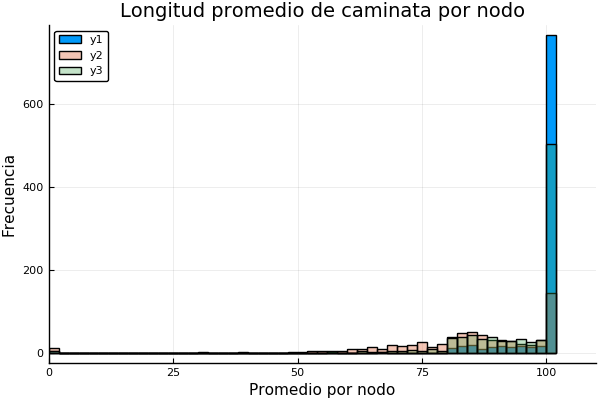

In [71]:
pyplot()
histogram(lpn_SA, 
    nbins = 50, 
    title="Longitud promedio de caminata por nodo", 
    xlabel="Promedio por nodo", 
    ylabel="Frecuencia",
    xlims = (0, 110))
histogram!(lpn_OW, nbins=50, falpha=0.4)
histogram!(lpn_ST, nbins=50, falpha=0.3)

## Cobertura

In [75]:
cobs_SA = @time cobertura(caminata_SA)

  0.170931 seconds (162.38 k allocations: 34.030 MiB, 10.76% gc time)


934-element Array{Any,1}:
 [71, 68, 66, 67, 75]
 [69, 69, 66, 56, 68]
 [72, 71, 65, 66, 71]
 [76, 62, 69, 75, 74]
 [63, 65, 69, 73, 67]
 [72, 72, 68, 77, 74]
 [66, 70, 64, 58, 64]
 [13, 74, 76, 62, 75]
 [61, 66, 66, 68, 71]
 [68, 63, 65, 67, 71]
 [69, 70, 67, 71, 66]
 [68, 69, 78, 69, 65]
 [72, 62, 73, 65, 64]
 ⋮                   
 [69, 61, 70, 70, 75]
 [72, 72, 72, 63, 69]
 [70, 63, 68, 69, 62]
 [66, 71, 65, 71, 66]
 [60, 36, 69, 68, 69]
 [64, 74, 65, 64, 70]
 [65, 68, 66, 72, 75]
 [68, 68, 69, 71, 66]
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     

In [76]:
cobs_OW = @time cobertura(caminata_OW)

  0.032576 seconds (70.99 k allocations: 19.054 MiB, 29.14% gc time)


698-element Array{Any,1}:
 [65, 65, 60, 64, 65]
 [60, 58, 64, 65, 62]
 [55, 61, 65, 60, 63]
 [9, 54, 60, 7, 64]  
 [65, 58, 61, 39, 60]
 [59, 62, 64, 54, 32]
 [4, 63, 67, 63, 67] 
 [68, 54, 42, 61, 22]
 [60, 66, 60, 60, 61]
 [29, 53, 4, 8, 53]  
 [29, 60, 62, 53, 63]
 [62, 63, 66, 27, 59]
 [47, 61, 44, 64, 50]
 ⋮                   
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     

In [77]:
cobs_ST = @time cobertura(caminata_ST)

  0.046783 seconds (96.87 k allocations: 28.751 MiB, 14.55% gc time)


900-element Array{Any,1}:
 [60, 68, 72, 69, 67]
 [65, 62, 65, 72, 67]
 [69, 68, 75, 50, 66]
 [78, 67, 70, 67, 65]
 [62, 32, 33, 70, 63]
 [74, 59, 70, 68, 69]
 [64, 67, 77, 70, 67]
 [62, 75, 68, 69, 72]
 [70, 69, 71, 64, 70]
 [68, 62, 65, 67, 66]
 [64, 70, 73, 61, 65]
 [68, 66, 64, 66, 67]
 [68, 70, 65, 66, 59]
 ⋮                   
 [74, 67, 68, 73, 69]
 [70, 70, 72, 65, 70]
 [73, 31, 60, 62, 49]
 [65, 67, 66, 70, 72]
 [73, 75, 61, 62, 64]
 [61, 64, 57, 71, 15]
 [65, 70, 66, 69, 61]
 [59, 75, 67, 67, 52]
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     
 [2, 2, 2, 2, 2]     

## Cobertura promedio de las caminatas de cada aeropuerto inicial

In [78]:
dif_SA = @time n_cobertura_av(caminata_SA)

  0.060978 seconds (119.89 k allocations: 32.036 MiB, 19.38% gc time)


934-element Array{Any,1}:
 69.4
 65.6
 69.0
 71.2
 67.4
 72.6
 64.4
 60.0
 66.4
 66.8
 68.6
 69.8
 67.2
  ⋮  
 69.0
 69.6
 66.4
 67.8
 60.4
 67.4
 69.2
 68.4
  2.0
  2.0
  2.0
  2.0

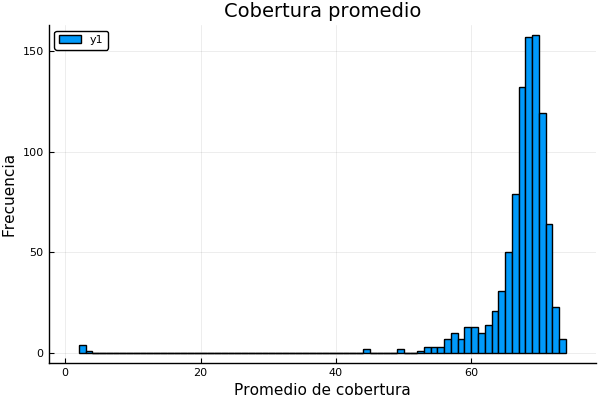

In [82]:
difSA = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

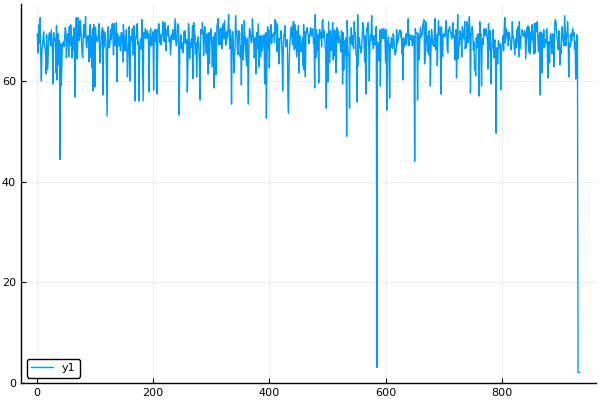

In [94]:
plot(dif_SA)

In [90]:
dif_SA

934-element Array{Any,1}:
 69.4
 65.6
 69.0
 71.2
 67.4
 72.6
 64.4
 60.0
 66.4
 66.8
 68.6
 69.8
 67.2
  ⋮  
 69.0
 69.6
 66.4
 67.8
 60.4
 67.4
 69.2
 68.4
  2.0
  2.0
  2.0
  2.0

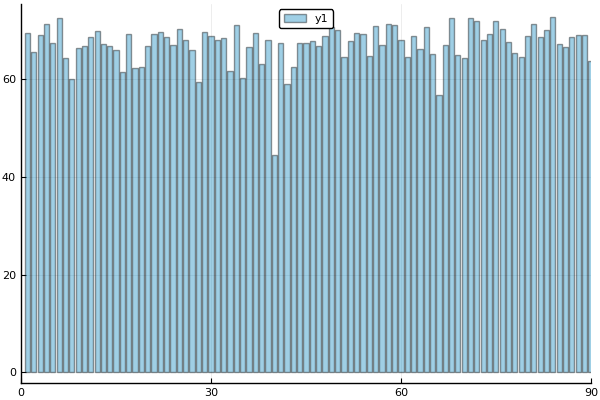

In [123]:
b = bar(dif_SA,xlim=(0,90),color="#0f87bf",alpha=0.4)

In [79]:
dif_OW = @time n_cobertura_av(caminata_OW)

  0.028695 seconds (71.70 k allocations: 19.081 MiB, 20.89% gc time)


698-element Array{Any,1}:
 63.8
 61.8
 60.8
 38.8
 56.6
 54.2
 52.8
 49.4
 61.4
 29.4
 53.4
 55.4
 53.2
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

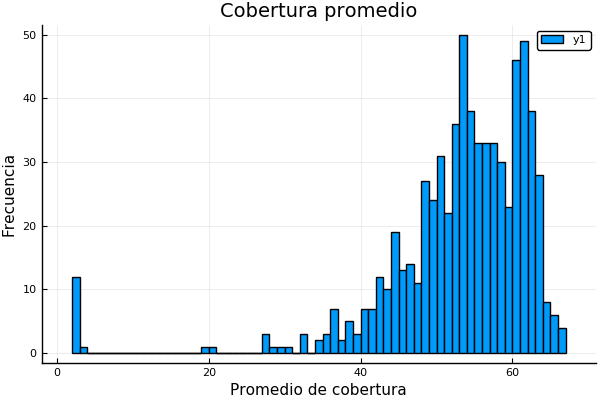

In [125]:
difOW = histogram(dif_OW, nbins=100,title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

In [80]:
dif_ST = @time n_cobertura_av(caminata_ST)

  0.036175 seconds (97.78 k allocations: 28.781 MiB, 13.50% gc time)


900-element Array{Any,1}:
 67.2
 66.2
 65.6
 69.4
 52.0
 68.0
 69.0
 69.2
 68.8
 65.6
 66.6
 66.2
 65.6
  ⋮  
 70.2
 69.4
 55.0
 68.0
 67.0
 53.6
 66.2
 64.0
  2.0
  2.0
  2.0
  2.0

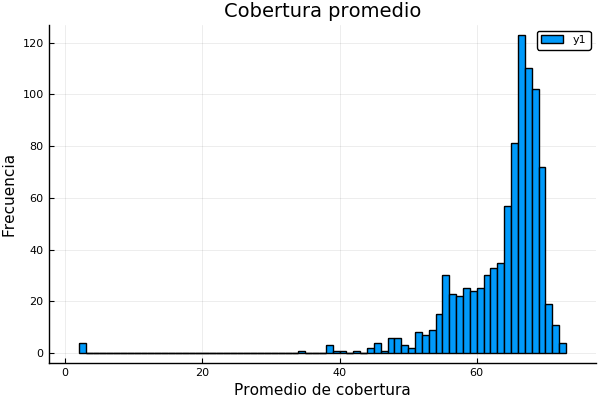

In [126]:
difST = histogram(dif_ST,nbins=100, title="Cobertura promedio", xlabel="Promedio de cobertura", ylabel="Frecuencia")

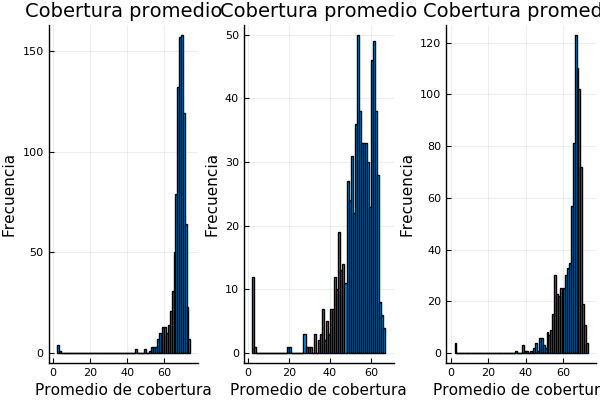

In [127]:
plot(difSA, difOW, difST, layout=(1,3),legend=false)

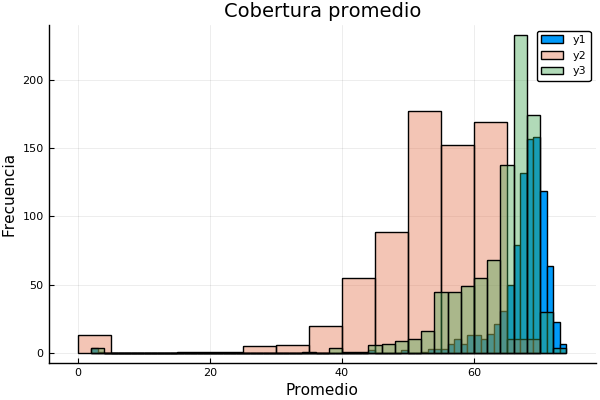

In [107]:
difs = histogram(dif_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
histogram!(dif_OW, falpha=0.4)
histogram!(dif_ST, falpha=0.4)

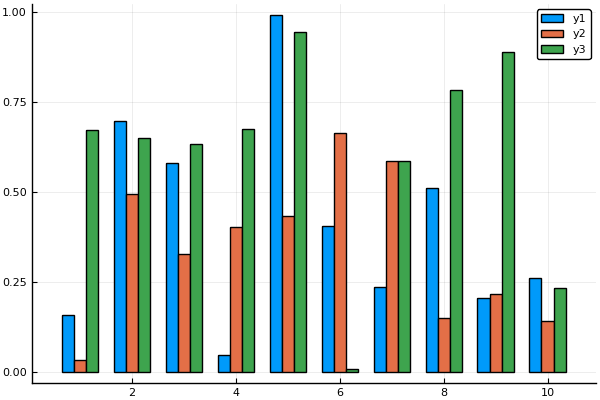

In [235]:
groupedbar(rand(10,3), bar_position = :dodge, bar_width=0.7)

In [ ]:
#Plot que en el eje x tenga cada nodo inicial (aeropuerto) y en el eje y el promedio

In [ ]:
h = bar(1:80, frqs, color="#0f87bf",align="center",alpha=0.4)

## Cobertura promedio por alianza

In [108]:
cobp_SA = @time cobertura_av(caminata_SA)

  0.112794 seconds (187.10 k allocations: 35.580 MiB, 9.02% gc time)


67.16466809421834

In [109]:
cobp_OW = @time cobertura_av(caminata_OW)

  0.033208 seconds (73.09 k allocations: 19.102 MiB, 29.51% gc time)


52.84813753581668

In [110]:
cobp_ST = @time cobertura_av(caminata_ST)

  0.044557 seconds (99.58 k allocations: 28.808 MiB, 14.84% gc time)


63.51622222222216

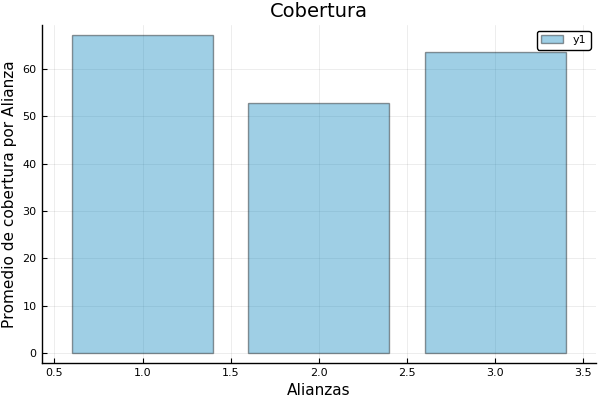

In [122]:
y = [cobp_SA, cobp_OW, cobp_ST]
b = bar(y,
    color="#0f87bf",
    title="Cobertura",
    xlabel="Alianzas",
    ylabel = "Promedio de cobertura por Alianza", 
    alpha=0.4)

In [118]:
b = bar(cobp_SA,color="#0f87bf",alpha=0.4)
bar!(cobp_OW,color="#0f00bf",alpha=0.4)
bar!(cobp_ST,color="#0f50bf",alpha=0.4)

ErrorException: No user recipe defined for Float64

In [ ]:
cobs_prom = plot(cobp_SA, title="Cobertura promedio", xlabel="Promedio", ylabel="Frecuencia")
plot!(cobp_OW, falpha=0.5)
plot!(cobp_ST, falpha=0.3)

In [288]:
d = [0 1 0
     1 0 1
     0 0 0]

3×3 Array{Int64,2}:
 0  1  0
 1  0  1
 0  0  0

In [292]:
rwd = random_walk(d, 3, 1)

3-element Array{Any,1}:
 [1 2 1 2]
 [2 1 2 3]
 [3 0 0 0]

In [295]:
uno=rwd[1]

1×4 Array{Int64,2}:
 1  2  1  2

In [294]:
nom_d = ["Yuriko", "Tombo", "Sak"]

3-element Array{String,1}:
 "Yuriko"
 "Tombo" 
 "Sak"   

In [310]:
nomuno=nom_d[uno]

1×4 Array{String,2}:
 "Yuriko"  "Tombo"  "Yuriko"  "Tombo"

In [298]:
his=counts(uno)

2-element Array{Int64,1}:
 2
 2

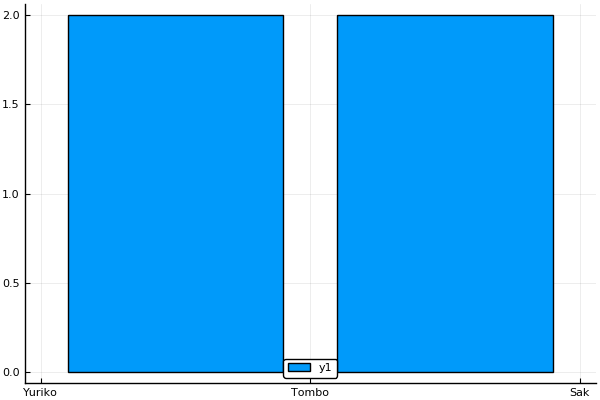

In [313]:
bar(nom_d,his)

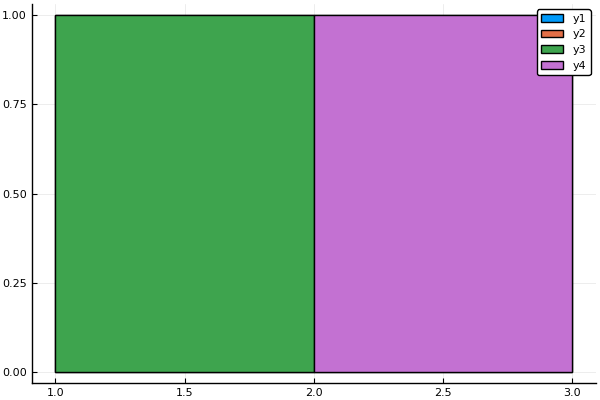

In [308]:
histogram(uno)
    #legend=)
#xticks=,
#yticks=)



In [309]:
?histogram

search: histogram Histogram histogram! histogram2d histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```


In [312]:
?bar

search: bar barh bar! barh! barhist barhist! baremodule SubArray GlobalRef



```
bar(x,y)
bar!(x,y)
```

Make a bar plot of y vs x. 

# Arguments

  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Examples

```julia-repl
julia> bar([1,2,3],[4,5,6],fillcolor=[:red,:green,:blue],fillalpha=[0.2,0.4,0.6])
julia> bar([(1,4),(2,5),(3,6)])
```


## 